In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parámetros
fs = 800 #Frecuencia de muestreo  (variable)
Ns = 800 #Cantidad de muestras
f_min = 0.1*(fs/2)
f_max = 0.4*(fs/2)
amplitude_min = 0
amplitude_max = 1
frecuencia_variable = np.linspace(f_min,f_max,Ns) #Variabilidad de la frecuencia en Hz
t = np.linspace(amplitude_min,amplitude_max,Ns)
chirp = t*np.sin(2*np.pi*frecuencia_variable*t)

Text(0.5, 1.0, 'Señal Chirp en el dominio del tiempo')

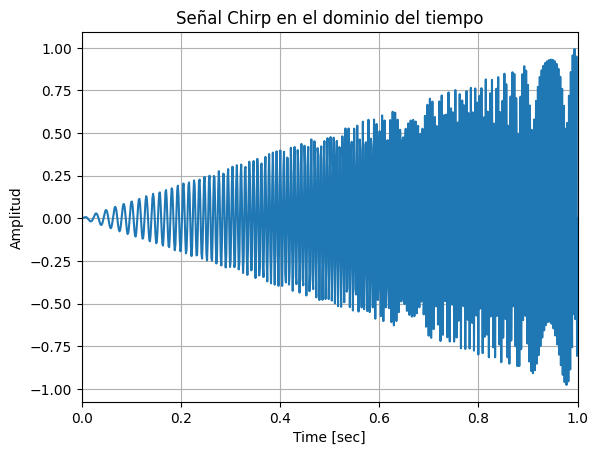

In [3]:
plt.figure(1)
plt.plot(t,chirp)
plt.xlim([0,1])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitud')
plt.title('Señal Chirp en el dominio del tiempo')

In [4]:
fft_chirp = np.fft.fftshift(np.fft.fft(chirp)) #Se obtiene la fft de chirp
spc = np.abs(fft_chirp)**2 #Sacamos el espectro en magnitud al cuadrado de chirp
freq = ((np.arange(Ns) - Ns/2) * fs / Ns)/fs #Se normaliza la frecuencia

Text(0.5, 1.0, 'Espectro de la señal Chirp')

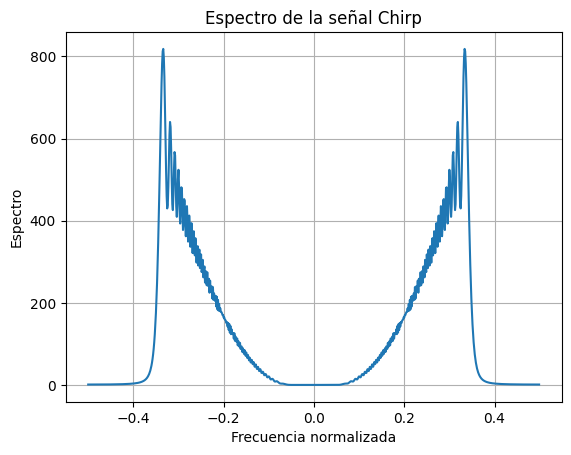

In [5]:
#Se plotea el espectro de chirp
plt.figure(2)
plt.plot(freq,spc)
plt.grid('on')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Espectro')
plt.title('Espectro de la señal Chirp')

#### b) (1 pto.) Generar filtros h y g (ver programa lab1.py), los cuales son filtros pasa bajo y pasa alto respectivamente. Graficar en frecuencia normalizada (donde 0.5 representa la frecuencia de Nyquist) y comentar.

In [6]:
h = np.array([-1.1748e-04,   6.7545e-04,  -3.9174e-04,  -4.8704e-03,   8.7461e-03,   1.3981e-02,  -4.4088e-02,
-1.7369e-02,   1.2875e-01,   4.7248e-04,  -2.8402e-01,  -1.5829e-02,   5.8535e-01,   6.7563e-01, 3.1287e-01,   5.4416e-02 ])

g = np.array([ -5.4416e-02,   3.1287e-01,  -6.7563e-01,   5.8535e-01,   1.5829e-02,  -2.8402e-01,  -4.7248e-04,
1.2875e-01,  1.7369e-02,  -4.4088e-02,   -1.3981e-02,   8.7461e-03,   4.8704e-03,  -3.9174e-04, -6.7545e-04,  -1.1748e-04 ])

h_rec = np.array([ 5.4416e-02,   3.1287e-01,   6.7563e-01,   5.8535e-01,  -1.5829e-02,  -2.8402e-01,   4.7248e-04,
1.2875e-01,  -1.7369e-02,  -4.4088e-02,   1.3981e-02,   8.7461e-03,  -4.8704e-03,  -3.9174e-04, 6.7545e-04,  -1.1748e-04 ])

g_rec = np.array([ -1.1748e-04,  -6.7545e-04,  -3.9174e-04,   4.8704e-03,   8.7461e-03,  -1.3981e-02,  -4.4088e-02,
1.7369e-02,   1.2875e-01,  -4.7248e-04,   -2.8402e-01,   1.5829e-02,   5.8535e-01,  -6.7563e-01, 3.1287e-01,  -5.4416e-02 ])

In [7]:
fft_h = np.fft.fftshift(np.fft.fft(h)) #Se obtiene la transformada de fourier fft de h
spec_h = np.abs(fft_h)**2 #Sacamos el espectro en magnitud al cuadrado de h
Ns_up = 16 #Numero de muestras que se obtuvieron
fs_up = 1000 #Frecuencia de muestreo (variable)
freq_up = ((np.arange(Ns_up) - Ns_up/2) * fs_up / Ns_up)/fs_up #Se normaliza la frecuencia

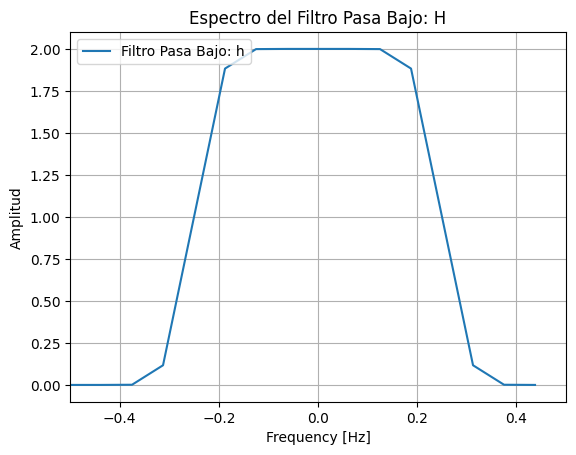

In [8]:
#Se plotea el espectro de h en base a la frecuencia normalizada
plt.figure(3)
plt.plot(freq_up,spec_h,label='Filtro Pasa Bajo: h')
plt.xlim([-0.5,0.5])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.ylabel('Amplitud')
plt.title('Espectro del Filtro Pasa Bajo: H')
plt.show()

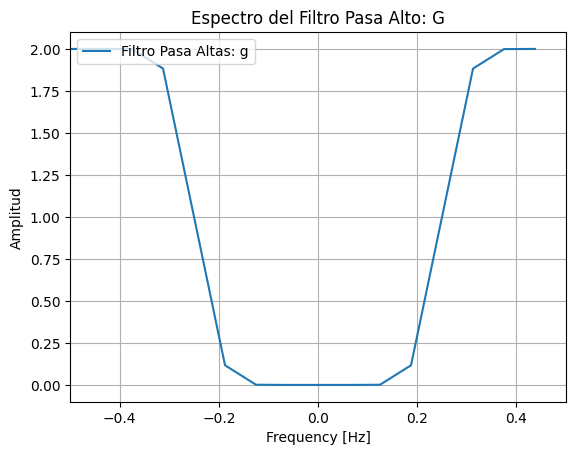

In [9]:
fft_g = np.fft.fftshift(np.fft.fft(g)) #Se obtiene la transformada de fourier fft de g
spec_g = np.abs(fft_g)**2 #Sacamos el espectro en magnitud al cuadrado de g
freq_g = ((np.arange(Ns_up) - Ns_up/2) * fs_up / Ns_up)/fs_up #Se normaliza la frecuencia

#Se plotea el espectro de g
plt.figure(4)
plt.plot(freq_g,spec_g,label='Filtro Pasa Altas: g')
plt.xlim([-0.5,0.5])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.title('Espectro del Filtro Pasa Alto: G')
plt.ylabel('Amplitud')
plt.show()

### c) (1 pto.) Convolucione la señal de entrada con los filtros h y g: XL = X∗h, XH =X∗g,mantenerel n´umero de muestras de la señal original. Grafique el espectro de ambas señales y comentar.

In [10]:
#Convolucion de la señal de entrada y h
# Convolucionar la señal chirp con los filtros h y g
XL = np.convolve(chirp, h, mode='same')  # Mantener el mismo número de muestras de la señal de entrada
XH = np.convolve(chirp, g, mode='same')

fft_XL = np.fft.fftshift(np.fft.fft(XL)) #Se obtiene la transformada de fourier fft de XL
fft_XH = np.fft.fftshift(np.fft.fft(XH)) #Se obtiene la transformada de fourier fft de XH
freq = ((np.arange(Ns) - Ns/2) * 1 / Ns) #Frecuencia en Hz

#Calculamos espectros de las señales
spec_XL = np.abs(fft_XL)**2
spec_XH = np.abs(fft_XH)**2


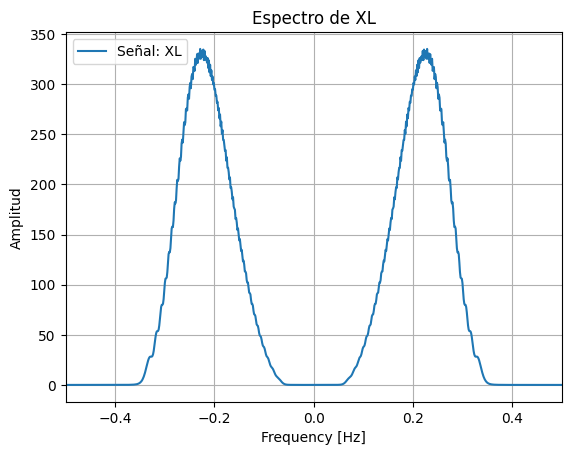

In [11]:
#Se plotea el espectro de XL
plt.figure(5)
plt.plot(freq,spec_XL,label='Señal: XL')
plt.xlim([-0.5,0.5])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.title('Espectro de XL')
plt.ylabel('Amplitud')
plt.show()

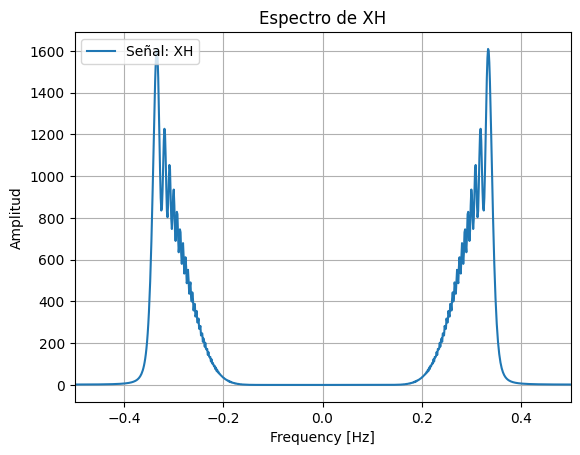

In [12]:
#Se plotea el espectro de XH
plt.figure(5)
plt.plot(freq,spec_XH,label='Señal: XH')
plt.xlim([-0.5,0.5])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.title('Espectro de XH')
plt.ylabel('Amplitud')
plt.show()

### d) (1 pto.) Submuestree (downsampling) con factor 2 las señales XL y XH. (XLDN = downsampling(XL) y XHDN = downsampling(XH)). Grafique el espectro de cada una de ellas y comentar.

In [13]:
D = 2 #Factor del Downsampling
Ns_dn = Ns/D
fs_dn = fs/D
n_dn = np.arange(Ns_dn)
XL_dn = XL[::D]
XH_dn = XH[::D]
t_dn = n_dn/fs_dn

In [14]:
fft_XL_dn = np.fft.fftshift(np.fft.fft(XL_dn)) #Se obtiene la transformada de fourier fft de XL_dn
fft_XH_dn = np.fft.fftshift(np.fft.fft(XH_dn)) #Se obtiene la transformada de fourier fft de XH_dn
#Se calculan los espectros de ambas señales pedidas
spec_XL_dn = np.abs(fft_XL_dn)**2 
spec_XH_dn = np.abs(fft_XH_dn)**2
#Vector de frecuencias en Hz
freq_dn = (n_dn - Ns_dn/2) * fs_dn / Ns_dn

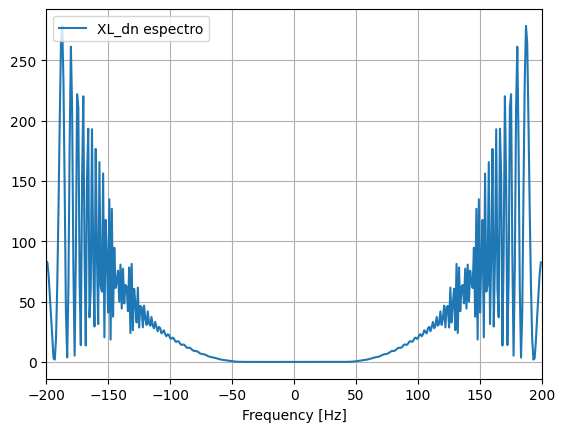

In [15]:
plt.figure(6)
plt.plot(freq_dn,spec_XL_dn,label='XL_dn espectro')
plt.xlim([-fs_dn/2,fs_dn/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()

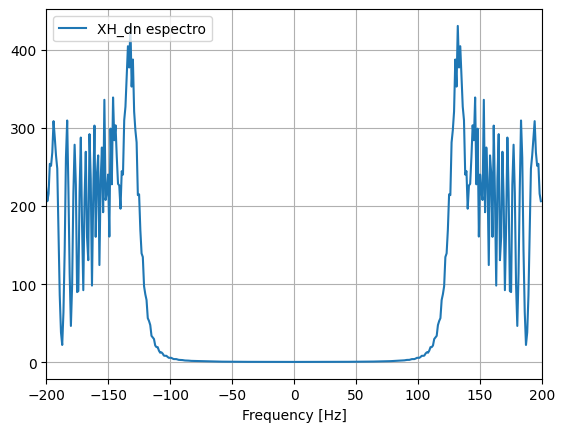

In [16]:
plt.figure(7)
plt.plot(freq_dn,spec_XH_dn,label='XH_dn espectro')
plt.xlim([-fs_dn/2,fs_dn/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()

###  e) (1 pto.) Realice un upsampling (factor 2) de las señales que previamente han pasado por el submuestreo. (YLUP = upsampling(XLDN) y YHUP = upsampling(XHDN)). Grafique el espectro de cada una de ellas y comentar.

In [17]:
U = 2 #Factor de Upsampling
Ns_up = U*Ns_dn
fs_up = U*fs_dn
n_up = np.arange(int(Ns_dn))
YL_up = np.zeros([int(Ns_up)]) #Vector inicializado en ceros de YL_up
YH_up = np.zeros([int(Ns_up)]) #Vector inicializado en ceros de YH_up
YL_up[U*n_up] = XL_dn[:] #Seteamos los valores de XL_dn en cada U-ésima posición
YH_up[U*n_up] = XH_dn[:] #Seteamos los valores de XH_dn en cada U-ésima posición

##Sacamos la fft de YL_up, el espectro YL_up y la frecuencia up
fft_YL_up = np.fft.fftshift(np.fft.fft(YL_up))
fft_YH_up = np.fft.fftshift(np.fft.fft(YH_up))
spec_YL_up = np.abs(fft_YL_up)**2
spec_YH_up = np.abs(fft_YH_up)**2
freq_up = (np.arange(Ns_up) - Ns_up/2) * fs_up / Ns_up

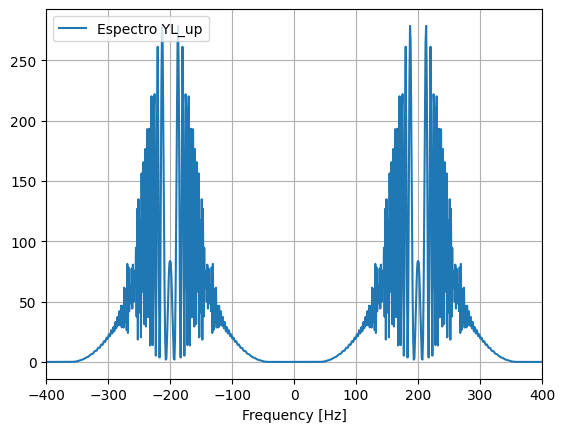

In [18]:
plt.figure(8)
plt.plot(freq_up,spec_YL_up,label='Espectro YL_up')
plt.xlim([-fs_up/2,fs_up/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()

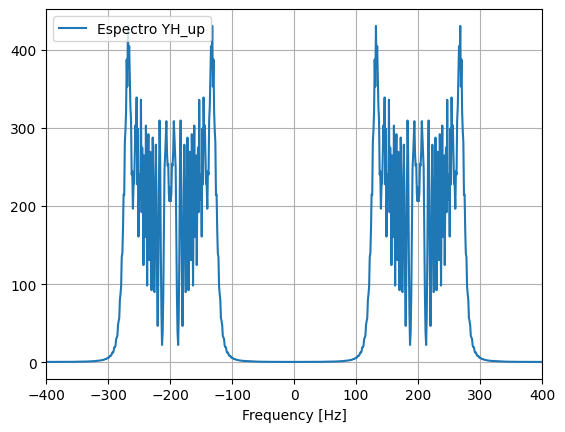

In [19]:
plt.figure(9)
plt.plot(freq_up,spec_YH_up,label='Espectro YH_up')
plt.xlim([-fs_up/2,fs_up/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()

### f) (1 pto.) Generar filtros hrec y grec (ver programa lab1.py). Convolucione las señales que previamente han pasado por la operación de upsampling con los filtros hrec y grec. YL = YLUP ∗hrec, YH = YHUP ∗grec, mantener el número de muestras de la señal original. Grafique el espectro de cada una de ellas y comentar.

In [20]:
YL = np.convolve(YL_up, h_rec, mode='same')  # Mantener el mismo número de muestras de la señal de entrada
YH = np.convolve(YH_up, g_rec, mode='same')

In [21]:
#Calculamos la fft de YL y YH
fft_YL = np.fft.fftshift(np.fft.fft(YL))
fft_YH = np.fft.fftshift(np.fft.fft(YH))
#Hallamos el espectro de ambas señales
spec_YL = np.abs(fft_YL)**2
spec_YH = np.abs(fft_YH)**2
#Vector de frecuencias
freq_up = (np.arange(Ns_up) - Ns_up/2) * fs_up / Ns_up

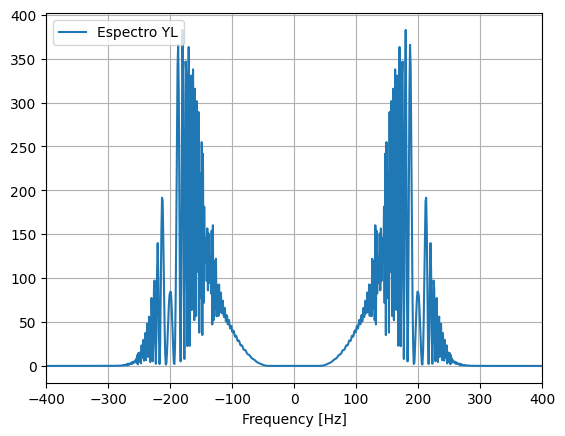

In [22]:
#Graficamos YL
plt.figure(10)
plt.plot(freq_up,spec_YL,label='Espectro YL')
plt.xlim([-fs_up/2,fs_up/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()

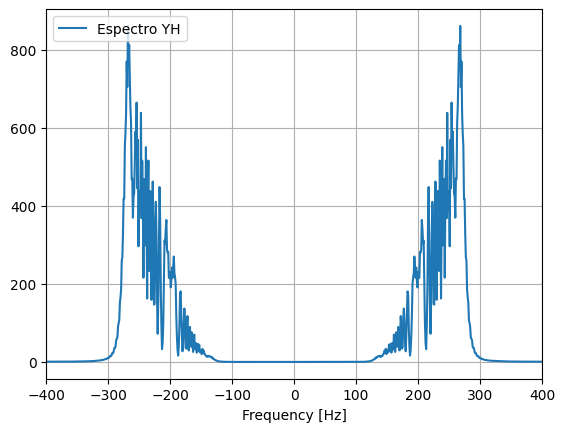

In [23]:
#Graficamos YH
plt.figure(11)
plt.plot(freq_up,spec_YH,label='Espectro YH')
plt.xlim([-fs_up/2,fs_up/2])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()

### g) (1 pto.) Compare la señal Y = YL+YH y compárela con la señal original. Graficar en el tiempo y frecuencia, comentar sus resultados.

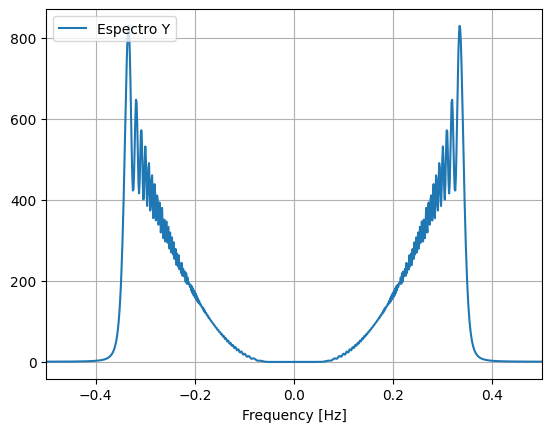

In [24]:
Y = YL + YH
fft_Y = np.fft.fftshift(np.fft.fft(Y)) #Sacamos fft a la señal Y
spec_Y = np.absolute(fft_Y)**2 #Sacamos el espectro de Y en valor absoluto cuadrático
freq_up_normalizada = ((np.arange(Ns_up) - Ns_up/2) * fs_up / Ns_up)/fs_up
#Graficamos en espectro Y
plt.figure(12)
plt.plot(freq_up_normalizada,spec_Y,label='Espectro Y')
plt.xlim([-0.5,0.5])
plt.grid('on')
plt.xlabel('Frequency [Hz]')
plt.legend(loc='upper left')
plt.show()
#El resultado obtenido es la señal de entrada original que denominamos chirp en un inicio

Text(0.5, 1.0, 'Señal Y en el dominio del tiempo')

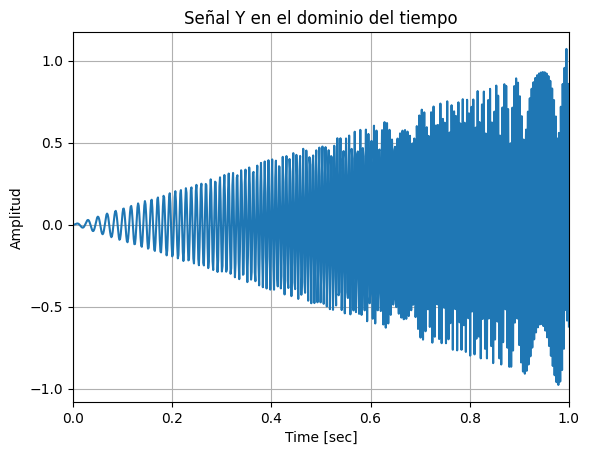

In [25]:
#Ploteamos la señal de entrada en tiempo
plt.figure(13)
plt.plot(t,Y)
plt.xlim([0,1])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitud')
plt.title('Señal Y en el dominio del tiempo')

#Observamos de los resultados que se tiene la misma señal chirp en el tiempo (la primera gráfica). Esto es posible debido a que primero a la señal chirp
#se le convolucionó con 2 filtros (uno pasa altos y otro pasa bajos) obteniendo 2 señales, a estas se les sometió a un proceso de Downsampling con un
#factor de 2 para posteriormente a ambas someterlas a un proceso de upsampling con factor 2. Luego a la que convolucionó en primera instancia con un filtro
#pasa bajo, se le convolucionó con un filtro pasabajo y a la otra señal con un filtro pasa alto, por lo que al realizar la suma de ambas, se obtiene la
#señal original como hemos apreciado por las gráficas tanto de tiempo y en frecuencia.

# Pregunta 2 (4 ptos)

### Se busca realizar la decimaci´on con factor 2 (reducir a la mitad la frecuencia de muestreo) de una señal de audio. La señal se encuentra corrompida por tono sinusuidal en una frecuencia mayor a la que señal de audio original se encuentra, para ello se realizará lo siguiente:

### a) (Tarea asíncrona) Leer el archivo audio.wav, identificar la frecuencia de muestreo y en base a ello generar un vector de tiempos. Graficar la señal en el tiempo y su espectro en frecuencia en Hz.

In [26]:
from scipy.io import wavfile

In [27]:
audio = 'audio.wav'

#Frecuencia de muestreo
frec_muestreo_2, array_muestras = wavfile.read(audio)
print(f"La frecuencia de muestreo es {frec_muestreo_2} Hz")
print(f"La cantidad de muestras es: {len(array_muestras)}")

La frecuencia de muestreo es 3000 Hz
La cantidad de muestras es: 36000


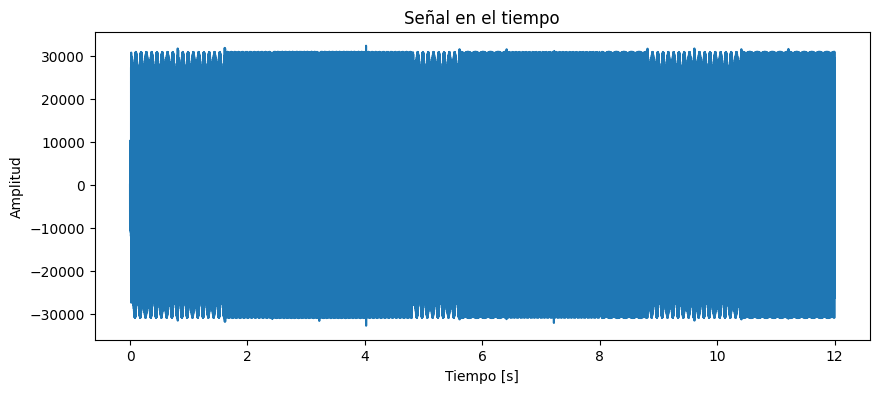

In [28]:
num_muestras = len(array_muestras)
duracion = num_muestras/frec_muestreo_2 #duracion total cantdiad de muestras * tiempo de muestreo
t = np.linspace(0, duracion, num_muestras) #vector de tiempos de 0 a 12 segundos con la cantidad de puntos = 36000

# Graficar señal en el tiempo
plt.figure(figsize=(10, 4)) #Dimensiones de la figura
plt.plot(t, array_muestras)
plt.title('Señal en el tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

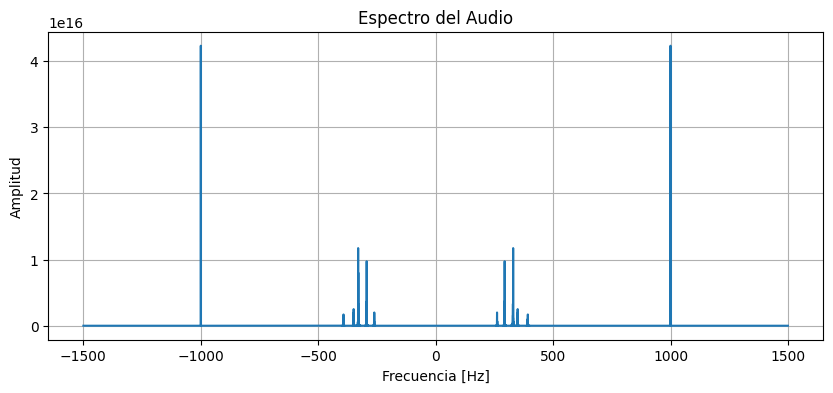

In [29]:
fft_signal = np.fft.fftshift(np.fft.fft(array_muestras)) #Transformada de fourier de la señal (siempre respecto a sus muestras)
spc = np.abs(fft_signal)**2 #Elevamos al cuadrado el valor absoluto de la señal
frecuencias = (np.arange(num_muestras) - num_muestras/2)*frec_muestreo_2/num_muestras #Vector de frecuencias para una trasnformada de Fourier

# Graficar espectro en frecuencia
plt.figure(figsize=(10, 4)) #Dimensiones de la figura
plt.plot(frecuencias, spc)  # Solo graficamos la mitad positiva
plt.title('Espectro del Audio')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid('on')
plt.show()

### b) (1 pto.) Hallar las frecuencias en las cuales se encuentra el audio original y la frecuencia específica del tono sinusoidal.

### La frecuencia del tono sinusoidal es la que se puede observar con un pico alto (esto también se puede oír en el audio), por lo que es la componente de más alta frecuencia en este caso el cual es de 1000 Hz. Por otro lado, las frecuencias de la señal original se encuentran entre los [-400;400] Hz (visto desde el espectro anteriormente ploteado).

###  c) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de muestreo aplicando solo downsampling. Graficar el espectro en frecuencia en Hz y guardar la señal generada.

In [31]:
#Como indica el enunciado, debemos hacer el proceso de downsampling a la mitad de la tasa de muestreo, por lo que será uno de factor 2.
Dw = 2
Ns_down = num_muestras/Dw
fs_down = frec_muestreo_2/Dw
n_dn = np.arange(Ns_down)
audio_dn = array_muestras[::Dw]

In [32]:
fft_audio_dn = np.fft.fftshift(np.fft.fft(audio_dn)) #Obtenemos la fft del audio_dn
spc_audio_dn = np.abs(fft_audio_dn)**2 #Sacamos el espectro con el módulo al cuadrado
freq_down = (n_dn - Ns_down/2) * fs_down / Ns_down #Vector de frecuencias en Hz

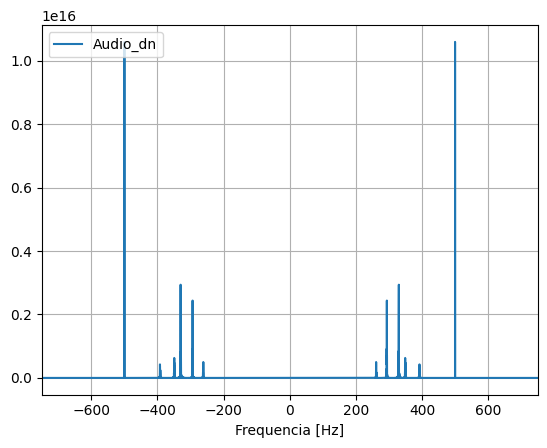

In [33]:
plt.figure(14)
plt.plot(freq_down,spc_audio_dn,label='Audio_dn')
plt.xlim([-fs_down/2,fs_down/2])
plt.grid('on')
plt.xlabel('Frequencia [Hz]')
plt.legend(loc='upper left')
plt.show()

### d) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de muestreo aplicando decimación, es decir aplicar un filtro pasa bajos ideal y luego efectuar el downsampling. Graficar el espectro en frecuencia en Hz y guardar la señal generada

[0. 0. 0. ... 0. 0. 0.]


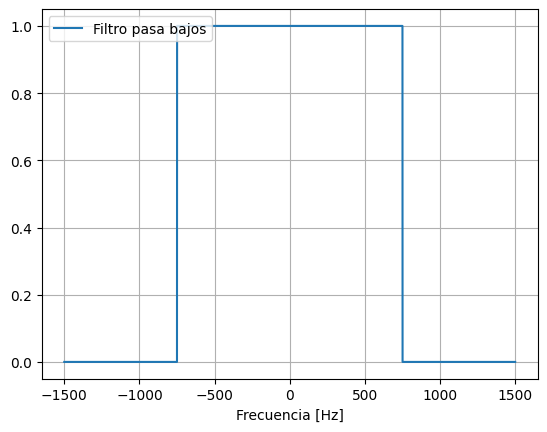

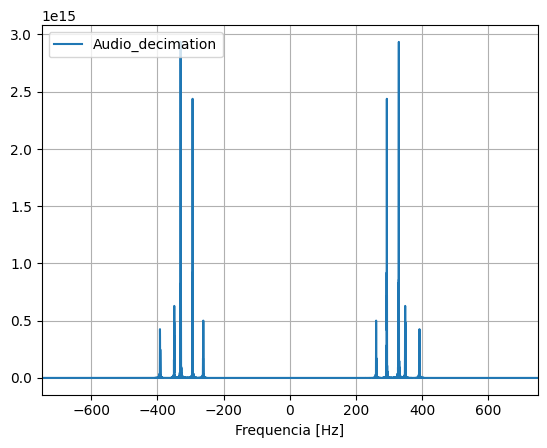

In [34]:
# Dado que la frecuencia angular normalizada de corte del FPBajo es pi/M, en este caso sería pi/2, entonces plasmamos en frecuencia en Hz, sería:
# frec_muestreo_2/4 ya que M = 2, por lo que efectuamos decimación en base a esa frecuencia de corte
fc = frec_muestreo_2/4 #Frecuencia de corte

# Crear el FPBajo con arreglo de 1´s
filtro_pbajo =  np.ones(len(frecuencias))

for i in range(len(frecuencias)):
    if np.abs(frecuencias[i]) > fc:
        filtro_pbajo[i] = 0
#Ya al pasar del valor de la frecuencia de corte entonces se colocan los ceros.

print(filtro_pbajo)
#Como tenemos el espectro de filtro_pbajo entonces multiplicamos ambos espectros:

fft_signal_fpbajo = fft_signal * filtro_pbajo
signal_new_time_i = np.fft.ifft(fft_signal_fpbajo) #Transformada inversa 
signal_new_time = np.real(signal_new_time_i)

# Graficamos el filtro que en nuestro caso es de 750 Hz
plt.figure(15)
plt.plot(frecuencias, filtro_pbajo, label='Filtro pasa bajos')
plt.grid('on')
plt.xlabel('Frecuencia [Hz]')
plt.legend(loc='upper left')
plt.show()

#Proceso de Dowsampling
Dw_new = 2
Ns_down_new = num_muestras/Dw_new
fs_down_new = frec_muestreo_2/Dw_new
n_dn_new = np.arange(Ns_down_new)
signal_new_time_dn = signal_new_time[::Dw_new]

#Ploteamos la transformada fft de la nueva señal
fft_signal_new_time_dn = np.fft.fftshift(np.fft.fft(signal_new_time_dn)) #Obtenemos la fft del audio_dn
spec_signal_new_time_dn = np.abs(fft_signal_new_time_dn)**2 #Sacamos el espectro con el módulo al cuadrado
freq_down_new = (n_dn_new - Ns_down_new/2) * fs_down_new / Ns_down_new #Vector de frecuencias en Hz

plt.figure(16)
plt.plot(freq_down_new,spec_signal_new_time_dn,label='Audio_decimation')
plt.xlim([-fs_down_new/2,fs_down_new/2])
plt.grid('on')
plt.xlabel('Frequencia [Hz]')
plt.legend(loc='upper left')
plt.show()



### e) (1 pto.) ¿Cómo se compararan ambos caso? ¿Cuál método recupera adecuadamente la señal original y cual produce aliasing? Explicar el por qué en ambos casos.

In [36]:
from scipy.io.wavfile import write
#Guardamos los audios para escucharlos y analizar si se realizó un correcto filtrado
write("resample_downsampling.wav", int(fs_down), audio_dn.astype(np.int16)) # Señal final del inciso c
write("resample_decimation.wav", int(fc), signal_new_time_dn.astype(np.int16)) #Señal final del inciso d

### La primera señal guardada (inciso b): Primero la señal de entrada pasó por un proceso de Downsampling donde se le disminuyó la tasa de muestreo a la mitad. Esto no resultó del todo bien ya que a la hora de analizar el espectro podemos seguir observando que sigue apareciendo impulsos muy altos debido a las componentes del tono sinusoidal que no fueron eliminadas, por lo que la señal original no se recupera. Sin embargo, para el caso en el inciso d: Decimation, pudimos primero filtrar la señal de entrada con un filtro Antialiasing el cual nos brinda la certeza de que las señales en altas frecuencias y en este caso no deseada (como la señal del tono) sean correctamente filtradas. Posteriormente, se pasó a hacer downsampling a la señal resultante y observamos en el espectro que ya no se muestran los impulsos que antes sí por la señal del tono sinusoidal por lo que es un buen indicador de que ha sido filtrada en su totalidad. El primer método garantiza el Downsampling sin embargo este método no garantiza que no pueda ocurrir Aliasing entre las componentes del espectro por lo que es mejor siempre y más conveniente realizar Decimation ya que al filtrar las señales primero y acotar la señal en cierto dominio frecuencial, nos hará tener menos probabilidad de tener Aliasing, como lo visto en esta experiencia.